In [76]:
import pandas as pd
train = pd.read_csv('training.csv.xls')

In [77]:
train.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [78]:
cols = train.columns
train.shape
cols

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [79]:
train.TransactionStartTime = pd.to_datetime(train.TransactionStartTime, format='%Y-%m-%d %H:%M:%S')

In [80]:
for i in cols:
    len(train.TransactionId.value_counts())
    print(i)
    exec("print(    len(train.%s.value_counts()))"%(i))

TransactionId
95662
BatchId
94809
AccountId
3633
SubscriptionId
3627
CustomerId
3742
CurrencyCode
1
CountryCode
1
ProviderId
6
ProductId
23
ProductCategory
9
ChannelId
4
Amount
1676
Value
1517
TransactionStartTime
94556
PricingStrategy
4
FraudResult
2


In [81]:
train.sort_values(by=['TransactionStartTime'],inplace=True)
train.reset_index(drop=True, inplace=True)
train['TransactionStartTime']=[i for i in range(train.shape[0])]


In [86]:
#fraud.head(50)
#gtcounts = train.groupby('CustomerId').count()
train['count'] = train.groupby('CustomerId')['CustomerId'].transform('count')

In [87]:
train.head()
cols = train.columns
cols = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'count','FraudResult']
train = train[cols]  

In [88]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,count,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,0,2,119,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,1,2,119,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,2,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,3,2,38,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,4,2,38,0


In [6]:
cols

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [106]:
train.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [108]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [92]:
train.sort_values(by=['TransactionStartTime'],inplace=True)
train.reset_index(drop=True, inplace=True)
train['TransactionStartTime']=[i for i in range(train.shape[0])]

In [93]:
X = train.iloc[:,7:-1].values
y = train.iloc[:,-1].values

In [94]:
X

array([['ProviderId_6', 'ProductId_10', 'airtime', ..., 0, 2, 119],
       ['ProviderId_4', 'ProductId_6', 'financial_services', ..., 1, 2,
        119],
       ['ProviderId_6', 'ProductId_1', 'airtime', ..., 2, 2, 2],
       ...,
       ['ProviderId_4', 'ProductId_6', 'financial_services', ..., 95659,
        2, 43],
       ['ProviderId_6', 'ProductId_19', 'tv', ..., 95660, 2, 524],
       ['ProviderId_4', 'ProductId_6', 'financial_services', ..., 95661,
        2, 524]], dtype=object)

In [96]:
X.shape

(95662, 9)

In [97]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_0 = LabelEncoder()
X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0])
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])

In [98]:
X

array([[5, 1, 0, ..., 0, 2, 119],
       [3, 19, 2, ..., 1, 2, 119],
       [5, 0, 0, ..., 2, 2, 2],
       ...,
       [3, 19, 2, ..., 95659, 2, 43],
       [5, 8, 7, ..., 95660, 2, 524],
       [3, 19, 2, ..., 95661, 2, 524]], dtype=object)

In [99]:
onehotencoder = OneHotEncoder(categorical_features = [0,2,7])
X= onehotencoder.fit_transform(X).toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [100]:
X.shape

(95662, 25)

In [101]:
from sklearn.preprocessing import StandardScaler 
X= StandardScaler().fit_transform(X)

In [337]:
y_=y.reshape(95662,1)

In [338]:
import numpy as np
trains = np.concatenate((X,y_), axis=1)

In [339]:
train = trains
train=pd.DataFrame(train[0:,0:],
            index=[i for i in range(train.shape[0])],
            columns=['f'+str(i) for i in range(train.shape[1])])

In [340]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25
0,-0.250373,-0.013719,-0.182517,-0.815149,-0.423397,1.341000,1.060447,-0.13096,-0.950503,-0.04281,...,-0.141085,0.44503,-0.406434,-1.578054,0.746738,-0.046371,-0.072291,-1.732033,-0.311831,0.0
1,-0.250373,-0.013719,-0.182517,1.226769,-0.423397,-0.745712,-0.942999,-0.13096,1.052074,-0.04281,...,-0.141085,0.44503,-0.406434,0.916063,-1.175144,-0.054643,-0.080251,-1.731996,-0.311831,0.0
2,-0.250373,-0.013719,-0.182517,-0.815149,-0.423397,1.341000,1.060447,-0.13096,-0.950503,-0.04281,...,-0.141085,0.44503,-0.406434,-1.716616,0.746738,-0.050426,-0.076352,-1.731960,-0.444993,0.0
3,3.994037,-0.013719,-0.182517,-0.815149,-0.423397,-0.745712,-0.942999,-0.13096,-0.950503,-0.04281,...,-0.141085,0.44503,-0.406434,-0.192433,0.746738,0.107717,0.096648,-1.731924,-0.404020,0.0
4,-0.250373,-0.013719,-0.182517,1.226769,-0.423397,-0.745712,-0.942999,-0.13096,1.052074,-0.04281,...,-0.141085,0.44503,-0.406434,0.916063,-1.175144,-0.059704,-0.075183,-1.731888,-0.404020,0.0


In [341]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(train, test_size=0.10, random_state=52)
train_x = train[train.f25 == 0] #where normal transactions
train_x = train.drop(['f25'], axis=1) #drop the class column


test_y = test_x['f25'] #save the class column for the test set
test_x = test_x.drop(['f25'], axis=1) #drop the class column

train_x = train_x.values #transform to ndarray
test_x = test_x.values

In [342]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

nb_epoch = 2
batch_size = 32
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 16
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [343]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 95662 samples, validate on 9567 samples
Epoch 1/2
95662/95662 [==============================] - 8s 84us/step - loss: 0.6005 - acc: 0.8349 - val_loss: 0.7420 - val_acc: 0.9692
Epoch 2/2
95662/95662 [==============================] - 9s 92us/step - loss: 0.4836 - acc: 0.9739 - val_loss: 0.6881 - val_acc: 0.9739


In [344]:
autoencoder = load_model('autoencoder_fraud.h5')

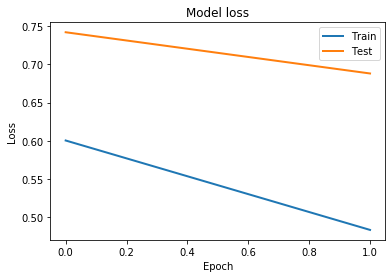

In [345]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [346]:
test_x.shape

(9567, 25)

In [377]:
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df['True_class'] = error_df.True_class.astype('int64')
error_df.describe()
#print(error_df[error_df.True_class==0]['Reconstruction_error'].mean())

,Reconstruction_error,True_class
count,9567.000000,9567.000000
mean,0.686926,0.003240
std,20.514439,0.056834
min,0.084006,0.000000
25%,0.137923,0.000000
50%,0.162283,0.000000
75%,0.229865,0.000000
max,1916.884380,1.000000


In [378]:
(0.01606163506484662+0.0045682806662151135)/2

0.010314957865530865

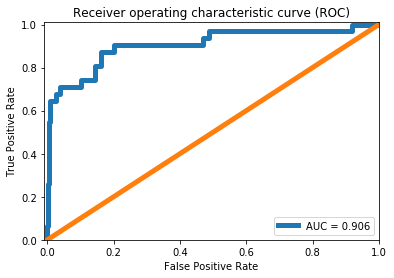

In [379]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

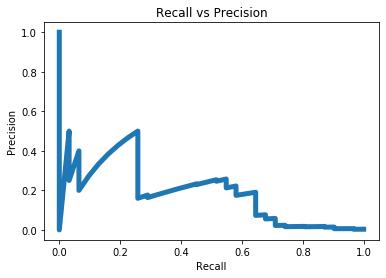

In [380]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

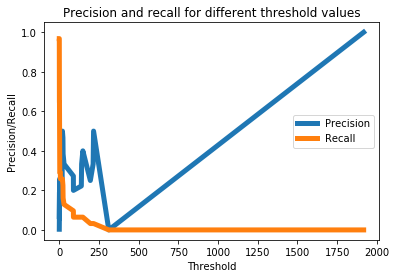

In [381]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

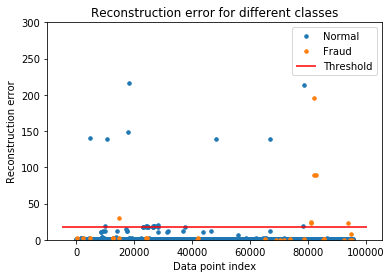

In [415]:
threshold_fixed = 18
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
plt.ylim(0,300)
for name, group in groups:
    #print(name, group)
    ax.plot( group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

Accuracy_score 0.9967596947841538
F1_score 0.3404255319148936
Recall score 0.25806451612903225


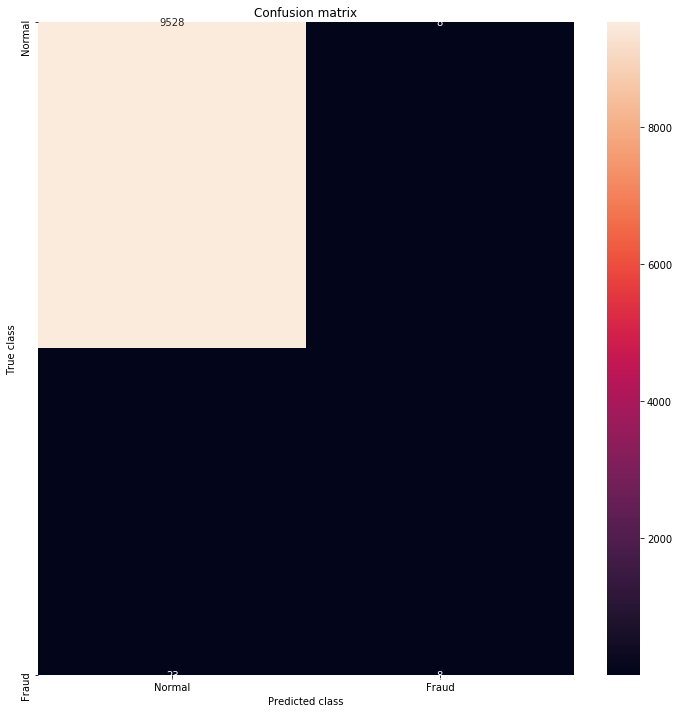

In [414]:
LABELS = ["Normal","Fraud"]
pred_y = [1 if (e > threshold_fixed+2.8 and threshold_fixed<30) else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

from sklearn.metrics import f1_score, accuracy_score, recall_score

print("Accuracy_score",accuracy_score(error_df.True_class, pred_y))

print("F1_score",f1_score(error_df.True_class, pred_y))

print("Recall score",recall_score(error_df.True_class, pred_y))
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [355]:
test = pd.read_csv('test.csv.xls')

In [356]:
test.shape

(45019, 15)

In [357]:
for i in test.columns:
    len(test.TransactionId.value_counts())
    print(i)
    exec("print(    len(test.%s.value_counts()))"%(i))

TransactionId
45019
BatchId
44684
AccountId
2471
SubscriptionId
2470
CustomerId
5018
CurrencyCode
1
CountryCode
1
ProviderId
6
ProductId
26
ProductCategory
9
ChannelId
5
Amount
998
Value
944
TransactionStartTime
44018
PricingStrategy
4


In [358]:
#test = test.drop(['ProductId','ChannelId'],axis=1)

In [359]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [360]:
test['count'] = test.groupby('CustomerId')['CustomerId'].transform('count')

test.head()
cols = test.columns
cols = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'count']
test = test[cols]  

In [361]:
test.sort_values(by=['TransactionStartTime'],inplace=True)
test.reset_index(drop=True, inplace=True)
test['TransactionStartTime']=[i for i in range(test.shape[0])]
#test['TransactionStartTime'] = MinMaxScaler(feature_range = (0,test.shape[0]-1)).fit_transform(test.TransactionStartTime.to_frame())

In [362]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,count
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,0,4,12
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,1,2,63
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,2,12
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,3,4,65
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,4,2,65


In [364]:
#test.head()

In [365]:
X_ = test.iloc[:,7:].values

In [366]:
X_.shape

(45019, 9)

In [367]:
X_[:, 0] = labelencoder_X_0.fit_transform(X_[:, 0])
X_[:, 1] = labelencoder_X_1.fit_transform(X_[:, 1])
X_[:, 2] = labelencoder_X_2.fit_transform(X_[:, 2])
X_[:, 3] = labelencoder_X_3.fit_transform(X_[:, 3])

In [368]:
#onehotencoder = OneHotEncoder(categorical_features = [0,2,7])
X_= onehotencoder.transform(X_).toarray()

In [369]:
X_.shape

(45019, 25)

In [370]:
X_= StandardScaler().fit_transform(X_)

In [371]:
X_.shape

(45019, 25)

In [372]:
test_x_predictions = autoencoder.predict(X_)
mse = np.mean(np.power(X_ - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse})
'''pred_y=[]
for e in error_df.Reconstruction_error.values:
    if e<0.010314957865530865:
        pred_y.append(0)
    elif e>0.010314957865530865:
        pred_y.append(1)'''
pred_y = [1 if e > threshold_fixed-15 else 0 for e in error_df.Reconstruction_error.values]


In [264]:
len(pred_y)

45019

In [265]:
test_x_predictions.shape

(45019, 25)

In [373]:
#final_submission = pd.DataFrame(data={'TransactionId':test.TransactionId, 'FraudResult':rfc_pred})
final_submission = pd.DataFrame(data={'TransactionId':test.TransactionId, 'FraudResult':pred_y})

In [374]:
final_submission.to_csv('submission.csv', index=False)

In [375]:
final_submission.FraudResult.value_counts()

0    44697
1      322
Name: FraudResult, dtype: int64